In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#pull the income statement, balance sheet, and cash flow statement 
# as downloaded from stockrow.com
ticker_inc_df = pd.read_excel(f'./Income/MSFT_inc.xlsx').T
ticker_bal_df = pd.read_excel(f'./BalanceSheet/MSFT_bal.xlsx').T
ticker_cfl_df = pd.read_excel(f'./CashFlow/MSFT_cashflow.xlsx').T

# change the first row to be the column headers
ticker_inc_df.columns = ticker_inc_df.iloc[0]
ticker_bal_df.columns = ticker_bal_df.iloc[0]
ticker_cfl_df.columns = ticker_cfl_df.iloc[0]

#remove the first row
ticker_inc_df = ticker_inc_df.iloc[1:]
ticker_bal_df = ticker_bal_df.iloc[1:]
ticker_cfl_df = ticker_cfl_df.iloc[1:]

ticker_inc_df.head(2)

Unnamed: 0,Revenue,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expenses,Operating Income,Interest Expense (Operating),Non-operating Income/Expense,Non-operating Interest Expenses,EBT,...,Free Cash Flow Margin,EBITDA,EBIT,"EPS (Diluted, from Cont. Ops)","EPS (Basic, Consolidated)","EPS (Basic, from Continuous Ops)",Income from Continuous Operations,Consolidated Net Income/Loss,EBITDA Margin,Operating Cash Flow Margin
2021-03-31 00:00:00,1.59969e+11,5.058e+10,1.09389e+11,2.0243e+10,2.4918e+10,6.4228e+10,2.479e+09,-3.79e+08,2.229e+09,6.5119e+10,...,0.3362,7.6074e+10,6.4228e+10,7.3471,7.4103,7.4103,5.6015e+10,5.6015e+10,0.4756,0.4545
2020-12-31 00:00:00,1.53284e+11,4.851e+10,1.04774e+11,1.9926e+10,2.4693e+10,6.0155e+10,2.46e+09,-2.24e+08,2.383e+09,6.0726e+10,...,0.329,7.2183e+10,6.0155e+10,6.7134,6.7744,6.7744,5.131e+10,5.131e+10,0.4709,0.4438


In [91]:
# these are the columns we're interested in
inc_columns = ['Revenue','Gross Profit','Operating Income','Income Tax Provision', 'Net Income Common']
bal_columns = ['Total Assets','Total current assets','Total liabilities','Total current liabilities',
               'Shareholders Equity (Total)','Shares (Common)']
cfl_columns = ['Dividends Paid (Common)','Capital expenditures','Operating Cash Flow']#,'Equity Repurchase (Common, Net)']

# this will apply only the columns above to each of our financial statement DataFrames
ticker_inc_df = ticker_inc_df[inc_columns]
ticker_bal_df = ticker_bal_df[bal_columns]
ticker_cfl_df = ticker_cfl_df[cfl_columns]

# this will combine or concatenate our three DataFrames into one
ticker_df = pd.concat([ticker_inc_df,ticker_bal_df,ticker_cfl_df], axis=1)

# defining a new column for FCF
ticker_df['FreeCashFlow'] = ticker_df['Operating Cash Flow'] - ticker_df['Capital expenditures']

ticker_df.head(2)

Unnamed: 0,Revenue,Gross Profit,Operating Income,Income Tax Provision,Net Income Common,Total Assets,Total current assets,Total liabilities,Total current liabilities,Shareholders Equity (Total),Shares (Common),Dividends Paid (Common),Capital expenditures,Operating Cash Flow,FreeCashFlow
2021-03-31 00:00:00,1.59969e+11,1.09389e+11,6.4228e+10,9.104e+09,5.6015e+10,308879000000,165614000000,174374000000,72193000000,134505000000,7534000000,-16172000000,-18914000000,72703000000,91617000000
2020-12-31 00:00:00,1.53284e+11,1.04774e+11,6.0155e+10,9.416e+09,5.131e+10,304137000000,173973000000,173901000000,67486000000,130236000000,7546000000,-15827000000,-17592000000,68028000000,85620000000


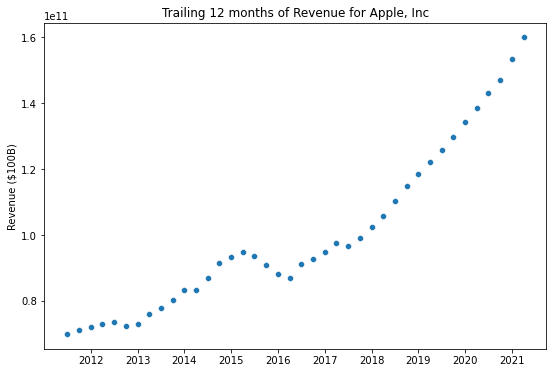

In [92]:
# TTM - Revenue
plt.figure(figsize=(9,6))
sns.scatterplot(x=ticker_df.index,y=ticker_df['Revenue'])
plt.title('Trailing 12 months of Revenue for Apple, Inc')
plt.ylabel('Revenue ($100B)');

## Growth rates 1
This method determines an average Revenue growth rate by taking the average of all 1-yr Revenue growth rates at t = 0, t = -1, t = -2 etc

In [93]:
# averaging all cumulative 1-yr revenue growths
rev_growth_list = [((ticker_df['Revenue'][i] - ticker_df['Revenue'][i+4]) / ticker_df['Revenue'][i+4]) 
                   for i in range(0,len(ticker_df['Revenue'])-4)]

print(f"Avg 1-yr Revenue growth rate: {round(sum(rev_growth_list)/len(rev_growth_list)*100,2)}%")

Avg 1-yr Revenue growth rate: 8.82%


##### Same for Free Cash Flow:

In [94]:
# averaging all FCF growth rates
fcf_growth_list1 = [((ticker_df['FreeCashFlow'][i] - ticker_df['FreeCashFlow'][i+4]) / ticker_df['FreeCashFlow'][i+4]) 
                   for i in range(0,len(ticker_df['FreeCashFlow'])-4)]

fcf_growth_rate1 = sum(fcf_growth_list1)/len(fcf_growth_list)
print(f"Free Cash Flow average 1-yr growth rate: {round(fcf_growth_rate1*100,2)}%")

Free Cash Flow average 1-yr growth rate: 12.24%


##### Same for *every* financial metric

In [95]:
#calculating all cumulative 1-yr average growths at once
growth_list1 = []
for col in ticker_df.columns:
    try:
        col_growth_list1 = [((ticker_df[col][i] - ticker_df[col][i+4]) / ticker_df[col][i+4]) 
                           for i in range(0,len(ticker_df[col])-4)]
        print(f"Avg growth for {col} is {sum(col_growth_list1)/len(col_growth_list1)}")
        growth_list1.append(sum(col_growth_list1)/len(col_growth_list1))
    except:
        print(f"{col} throws an error")

all_metrics_growth_rate1 = sum(growth_list1)/len(growth_list1) 
print(f"Avg growth: {all_metrics_growth_rate1}")

Avg growth for Revenue is 0.08823901120076255
Avg growth for Gross Profit is 0.0747623989635195
Avg growth for Operating Income is 0.13246176474406274
Avg growth for Income Tax Provision is 0.31455886842931635
Avg growth for Net Income Common is 0.209407963941271
Avg growth for Total Assets is 0.12004920998464032
Avg growth for Total current assets is 0.10118107889099814
Avg growth for Total liabilities is 0.16087922620823186
Avg growth for Total current liabilities is 0.1257705584874432
Avg growth for Shareholders Equity (Total) is 0.09043696083895107
Avg growth for Shares (Common) is -0.01157847792311903
Avg growth for Dividends Paid (Common) is 0.12250587786410286
Avg growth for Capital expenditures is 0.282540949668136
Avg growth for Operating Cash Flow is 0.10550967173624155
Avg growth for FreeCashFlow is 0.12235809337743316
Avg growth: 0.13593887709413274


In [96]:
# this code sorts the growth rates from low to high, 
# then it removes the top 2 and lowest 2
growth_list1.sort()
normalized_ticker_growth1 = sum(growth_list1[2:-2]) / len(growth_list1[2:-2])

print(f"The 'normalized' growth rate for (almost all) metrics: {round(normalized_ticker_growth1*100,2)}%")

The 'normalized' growth rate for (almost all) metrics: 12.53%


## Growth rates 2
This method determines an average Revenue growth rate by taking the 1-yr, 2-yr, 3-yr etc. growth rates and averaging them all together

In [97]:
#this version only considers growth rate starting from t = 0, looking backwards at quarterly data
fcf_growth_list2 = [((1+((ticker_df['FreeCashFlow'][0] - ticker_df['FreeCashFlow'][i+4]) / ticker_df['FreeCashFlow'][i+4]))**(1/(1+i/4))-1) 
                    for i in range(len(ticker_df['FreeCashFlow'])-4)]

fcf_growth_rate2 = sum(fcf_growth_list2)/len(fcf_growth_list2)
print(f"Free Cash Flow avg growth rate last decade: {round(fcf_growth_rate2*100,2)}%")

Free Cash Flow avg growth rate last decade: 17.27%


In [98]:
growth_list2 = []
for col in ticker_df.columns:
    try:
        col_growth_list2 = [((1+((ticker_df[col][0] - ticker_df[col][i+4]) / ticker_df[col][i+4]))**(1/(1+i/4))-1) 
                            for i in range(len(ticker_df[col])-4)]
        print(f"Avg growth for {col} is {sum(col_growth_list2)/len(col_growth_list2)}")
        growth_list2.append(sum(col_growth_list2)/len(col_growth_list2))
    except:
        print(f'{col} throws an error')
        
all_metrics_growth_rate2 = sum(growth_list2)/len(growth_list2) 
print(f"Avg growth of all metrics: {all_metrics_growth_rate2}")

Avg growth for Revenue is 0.11749820292160577
Avg growth for Gross Profit is 0.12361405311871954
Avg growth for Operating Income is 0.19372170858632576
Avg growth for Income Tax Provision is 0.10761197085709956
Avg growth for Net Income Common is 0.23815893203326066
Avg growth for Total Assets is 0.09245833261676834
Avg growth for Total current assets is 0.04110395305486526
Avg growth for Total liabilities is 0.08187311119649661
Avg growth for Total current liabilities is 0.10032356935437428
Avg growth for Shareholders Equity (Total) is 0.12046391113771587
Avg growth for Shares (Common) is -0.009997857438944716
Avg growth for Dividends Paid (Common) is 0.0965600459674968
Avg growth for Capital expenditures is 0.2239907603940606
Avg growth for Operating Cash Flow is 0.1641020958218614
Avg growth for FreeCashFlow is 0.17274063176872953
Avg growth of all metrics: 0.12428156142602902


In [99]:
# this code sorts the growth rates from low to high, 
# then it removes the top 2 and lowest 2
growth_list2.sort()
normalized_ticker_growth2 = sum(growth_list2[2:-2]) / len(growth_list2[2:-2])

print(f"The 'normalized' growth rate for (almost all) metrics: {round(normalized_ticker_growth2*100,2)}%")

The 'normalized' growth rate for (almost all) metrics: 12.46%


## DCF Models

In [112]:
# DCF using the treasury rate as the discount rate and avg. FCF growth as growth rate
discount_rate = 0.0163

def dcf_maker(ticker_df,growth_rate,discount_rate,years):
    # we start at zero, then incrementally add each subsequent year's FCF
    fcf_over_time = 0
    # our base will be the most recent year's FCF
    fcf_start = ticker_df['FreeCashFlow'][0]

    # covering a range of 10 years
    for i in range(1,years+1):
        fcf_over_time += fcf_start * (1+growth_rate)**i / (1+discount_rate)**i

    print(f"Total FCF: ${round(fcf_over_time/1_000_000_000,1)} billion")
    return fcf_over_time

In [113]:
test1 = dcf_maker(ticker_df=ticker_df,growth_rate=0.1,discount_rate=0.0163,years=10)

Total FCF: $1452.7 billion


In [125]:
all_growth_rates = [fcf_growth_rate1,fcf_growth_rate2,all_metrics_growth_rate1,all_metrics_growth_rate2,
                    normalized_ticker_growth1, normalized_ticker_growth2]
rate_list = 0.0163
years=10

for grow_rate in all_growth_rates:
    print(f"Growth rate: {round(grow_rate*100,2)}%")
    dcf_maker(ticker_df,grow_rate,rate_list,years)

Growth rate: 12.24%
Total FCF: $1646.6 billion
Growth rate: 17.27%
Total FCF: $2188.1 billion
Growth rate: 13.59%
Total FCF: $1777.3 billion
Growth rate: 12.43%
Total FCF: $1664.5 billion
Growth rate: 12.53%
Total FCF: $1674.5 billion
Growth rate: 12.46%
Total FCF: $1667.8 billion


In [85]:
growth_rate = fcf_growth_rate1
discount_rate = 0.05
years=15

dcf_maker(ticker_df,growth_rate,discount_rate,years)

Total FCF: $2420.4 billion


In [107]:
np.linspace(0.01,0.15,15)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15])

In [14]:
# Calculate most recent FCF, next year FCF, and discount next year's FCF
# discount_rate is treasury rate here
bill = 1_000_000_000
discount_rate = 0.0163

print(f"Most recent FCF: ${round(ticker_df['FreeCashFlow'][0]/bill,2)} billion")
print(f"Next year FCF: ${round(ticker_df['FreeCashFlow'][0]*(1+fcf_growth_rate1)/bill,2)} billion")
print(f"Next year FCF, discounted: ${round(ticker_df['FreeCashFlow'][0]*(1+fcf_growth_rate1)**(1)/(1+discount_rate)/bill,2)} billion")

Most recent FCF: $108.71 billion
Next year FCF: $119.62 billion
Next year FCF, discounted: $117.7 billion


In [15]:
# DCF using the treasury rate as the discount rate and avg. FCF growth as growth rate
treasury_rate = 0.0163
# we start at zero, then incrementally add each subsequent year's FCF
fcf_over_time1 = 0
# our base will be the most recent year's FCF
fcf_start = ticker_df['FreeCashFlow'][0]

# covering a range of 10 years
for i in range(1,10+1):
    fcf_over_time1 += fcf_start * (1+fcf_growth_rate1)**i / (1+treasury_rate)**i
    print(f"Year {i}: ${round(fcf_start * (1+fcf_growth_rate1)**i / (1+treasury_rate)**i / 1_000_000_000,1)} billion")

print(f"Total FCF: ${round(fcf_over_time1/1_000_000_000,1)} billion")

Year 1: $117.7 billion
Year 2: $127.4 billion
Year 3: $138.0 billion
Year 4: $149.4 billion
Year 5: $161.7 billion
Year 6: $175.1 billion
Year 7: $189.6 billion
Year 8: $205.3 billion
Year 9: $222.2 billion
Year 10: $240.6 billion
Total FCF: $1726.9 billion


In [16]:
# DCF using 5% as the discount rate and avg. FCF growth as growth rate
discount_rate = 0.05
# we start at zero, then incrementally add each subsequent year's FCF
fcf_over_time = 0
# our base will be the most recent year's FCF
fcf_start = ticker_df['FreeCashFlow'][0]

# covering a range of 15 years
for i in range(1,15+1):
    fcf_over_time += fcf_start * (1+fcf_growth_rate1)**i / (1+discount_rate)**i
    print(f"Year {i}: ${round(fcf_start * (1+fcf_growth_rate1)**i / (1+discount_rate)**i / 1_000_000_000,1)} billion")

print(f"Total FCF: ${round(fcf_over_time/1_000_000_000,1)} billion")

Year 1: $113.9 billion
Year 2: $119.4 billion
Year 3: $125.1 billion
Year 4: $131.1 billion
Year 5: $137.4 billion
Year 6: $144.0 billion
Year 7: $150.9 billion
Year 8: $158.1 billion
Year 9: $165.7 billion
Year 10: $173.6 billion
Year 11: $181.9 billion
Year 12: $190.7 billion
Year 13: $199.8 billion
Year 14: $209.4 billion
Year 15: $219.4 billion
Total FCF: $2420.4 billion


In [18]:
# turning FCF into per-share stock price predictions
ticker_fcf1 = round(fcf_over_time1/ticker_df['Shares (Common)'][0],2)
ticker_fcf2 = round(fcf_over_time/ticker_df['Shares (Common)'][0],2)

avg_fcf = round((ticker_fcf1 + ticker_fcf2)/2,2)

print(f"Total FCF per share, v1: ${ticker_fcf1}")
print(f"Total FCF per share, v2: ${ticker_fcf2}")
print(f"Average FCF per share: ${avg_fcf}")

Total FCF per share, v1: $103.49
Total FCF per share, v2: $145.05
Average FCF per share: $124.27


In [19]:
# DCF using treasury as discount rate and all AAPL growth as growth rate
treasury_rate = 0.05
fcf_over_time = 0
fcf_start = ticker_df['FreeCashFlow'][0]
for i in range(1,15+1):
    fcf_over_time += fcf_start * (1+normalized_ticker_growth)**i / (1+treasury_rate)**i

fcf_over_time/1_000_000_000

2291.3389834781656

In [18]:
# if total growth over 5 years is 180%
# then the growth rate is:
growth_180 = 1.8**(1/5)
growth_180

1.1247461131420948

In [19]:
for i in range(0,25):
    print(f"{1+i/4} - {1.80**(1/(1+i/4))}")

1.0 - 1.8
1.25 - 1.60036116503796
1.5 - 1.479727244598282
1.75 - 1.399168447706693
2.0 - 1.3416407864998738
2.25 - 1.2985373526865052
2.5 - 1.2650538190282499
2.75 - 1.2383014044559357
3.0 - 1.21644039911468
3.25 - 1.1982443398361224
3.5 - 1.1828645094459014
3.75 - 1.1696950930790704
4.0 - 1.158292185288269
4.25 - 1.1483231463818495
4.5 - 1.139533831304058
4.75 - 1.1317267469617007
5.0 - 1.1247461131420948
5.25 - 1.118467410511232
5.5 - 1.1127899192821329
5.75 - 1.1076312962277344
6.0 - 1.1029235690267392
6.25 - 1.098610134036251
6.5 - 1.0946434761309831
6.75 - 1.0909834159010432
7.0 - 1.0875957472544207
